In [1]:
# %load ../../preconfig.py
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
plt.rcParams['axes.grid'] = False

#import numpy as np
#import pandas as pd

#import sklearn

#import itertools

import logging
logger = logging.getLogger()

25 All-Pairs Shortest Paths
===========================

### 25.1 Shortest paths and matrix multiplication
This section presents a dynamic-programming algorithm: 

1. Characterize the structure of an optimal solution.
   all subpaths of a shortest path are shortest paths.

2. Recursively define the value of an optimal solution.
   let $l_{i, j}^{(m)}$ be the minimum weight of any path from vertex $i$ to vertex $j$ that contains at most $m$ edges. Thus,
   \begin{equation}
       l_{i, j}^{(0)} = \begin{cases}
           0 & \quad \text{if } i = j \\
           \infty & \quad \text{otherwise}
       \end{cases}
   \end{equation}
   
   we recursively define:
   \begin{equation}
       l_{i, j}^{(m)} = \displaystyle \min_{1 \leq k \leq n} \{ l_{i, k}^{(m-1)} + w_{k, j} \}
   \end{equation}

3. Compute the value of an optimal solution in a bottom-up fashion.
   We now compupte a series of matrices $L^{(1)}, L^{(2)}, \dotsc, L^{(n-1)}$, where $L^{(1)} = W$.

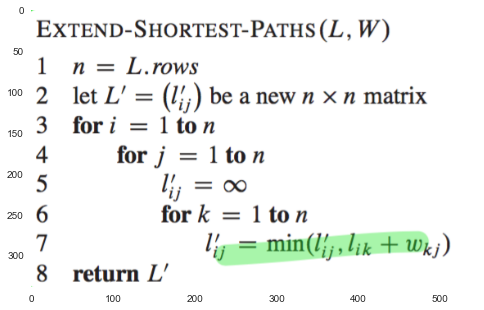

In [3]:
plt.imshow(plt.imread('./res/ext_short_path.png'))

If we replace $\infty$ by 0 in `EXTEND-SHORTEST-PATHS`, it can be converted to matrix muplication: $L^{(n-1)} = W^{n-1}$.

##### Improving the running time
We can compute $L^{(n-1)}$ by divide-and-conquer methods: $O(n) \to $O(\lg n)$.

Total running time: $O(n^3 n) \to O(n^3 \lg n)$

In [4]:
# Exercises

### 25.2 The Floyd-Warshall algorithm
use a different dynamic-programming formulation to solve. $O(V^3)$.

#### The structure of a shortest path
**intermediate** vertex of a simple path $p = <v_1, v_2, \dotsc, v_n>$ is any vertex of $p$ other than $v_1$ or $v_n$.

Consider all paths from $i$ to $j$ whose intermediate vertices are all drawn from $\{1, 2, \dotsc, k\}$, and let $p$ be a minimum-weight path from among them.

+ If $k$ is not an intermediate vertex of path $p$, then all intermediate vertices of path $p$ are in the set $\{1, 2, \dotsc, k-1\}$.

+ If $k$ is an intermediate vertex of path $p$, then we decompose $p$ into $i \overset{p_1}{\to} k \overset{p_2}{\to} j$, so all intermediate vertices of $p_1$ are in the set $\{1, 2, \dotsc, k-1\}$, same with $p_2$.

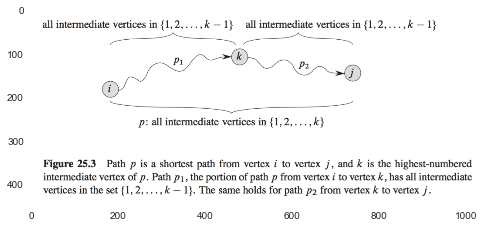

In [2]:
plt.imshow(plt.imread('./res/fig25_3.png'))

#### A recursive solution to the all-pairs shortest-paths problem
Let $d_{i j}^{(k)}$ be the weight of a shortest path from vertex $i$ to vertex $j$ for which all intermediate vertices are in the set $\{1, 2, \dotsc, k\}$.

\begin{equation}
    d_{i j}^{(k)} = \begin{cases}
        w_{i j} & \quad \text{if } k = 0 \\
        \min(d_{i j}^{(k-1)}, d_{i k}^{(k-1)} + d_{k j}^{(k-1)}) & \quad \text{if } k \geq 1
    \end{cases}
\end{equation}

#### Computing the shortest-path weights bottom up

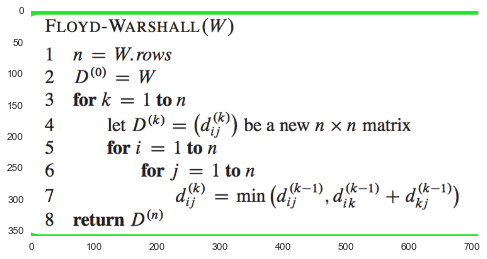

In [3]:
plt.imshow(plt.imread('./res/floyd_warshall.png'))

#### Constructing a shortest path

#### Transitive closure of a directed graph
to determine whether $G$ contains a path from $i$ to $j$ for all vetex pairs $i, j \in V$.

This method subsitutes the logical OR and logical AND for the arithmetic operations $\min$ and $+$ in the Floyd_Warshall algorithm.

In [4]:
#Exercises

### 25.3 Johnson's algorithm for sparse graphs
+ if all edge weight $w$ in a graph $G = (V, E)$ are nonnegative, find shortest paths by running Dijkstra's algorithm once from each vertext;

+ if $G$ has negative-weight edges but no negative weight cycles, we use *reweighting* to convert it to a graph of nonegative edges. 

In [ ]:
#Exercises